<a href="https://colab.research.google.com/github/Ashishpathak78/ML_-Practice/blob/Ashish/ML_AssignmentQ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Prediction — Final Notebook (Regression & Classification)

- Feature selection: constant, quasi-constant, highly correlated checks (and dropping when appropriate).
- Regression (Linear, Ridge, Lasso) with evaluation, plots, and comparison table.
- Classification (Logistic Regression, Random Forest) with evaluation, confusion matrices, ROC curves, feature importance, and comparison table.
- Final short summary recommending best models.

_Dataset:_ UCI Wine Quality (default: **red wine**).

In [ ]:
# --- Load libraries and dataset ---
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold

sns.set(style='whitegrid')

# Dataset URLs
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

use_white = False
url = url_white if use_white else url_red

df = pd.read_csv(url, sep=';')
print('Dataset shape:', df.shape)
df.head()


Dataset shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Data Analysis (EDA)
Below we inspect basic info, distribution of the target, histograms for features, KDEs and boxplots. Short, simple explanations follow each plot.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


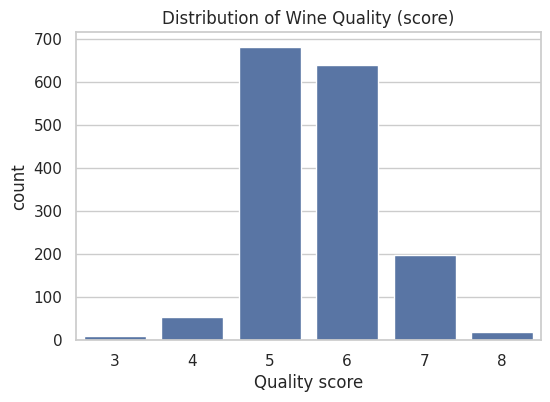

Explanation: The countplot shows how many wines have each quality score. For red wine, scores are typically between 3-8.


In [ ]:
# Basic info
display(df.info())
display(df.describe())

# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality (score)')
plt.xlabel('Quality score')
plt.show()

print('Explanation: The countplot shows how many wines have each quality score. For red wine, scores are typically between 3-8.')


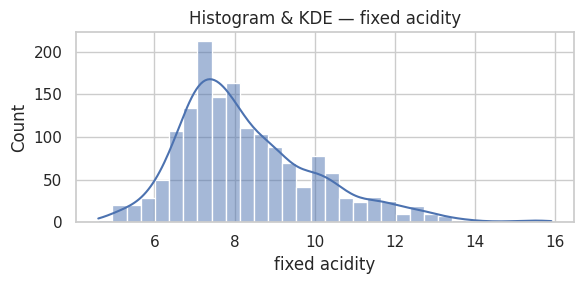

Explanation: This shows the distribution of fixed acidity. Look for skewness or multiple peaks.


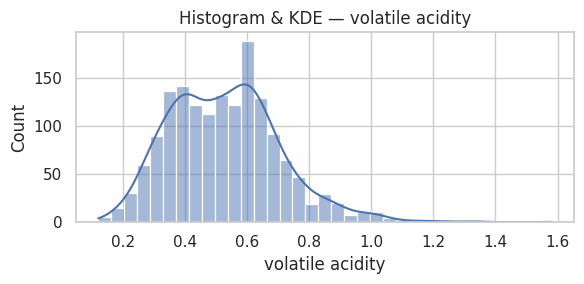

Explanation: This shows the distribution of volatile acidity. Look for skewness or multiple peaks.


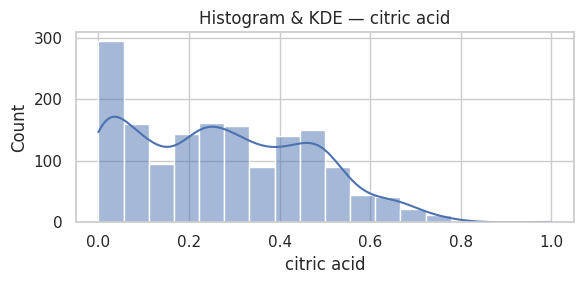

Explanation: This shows the distribution of citric acid. Look for skewness or multiple peaks.


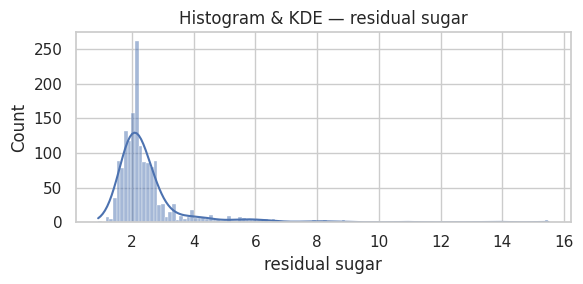

Explanation: This shows the distribution of residual sugar. Look for skewness or multiple peaks.


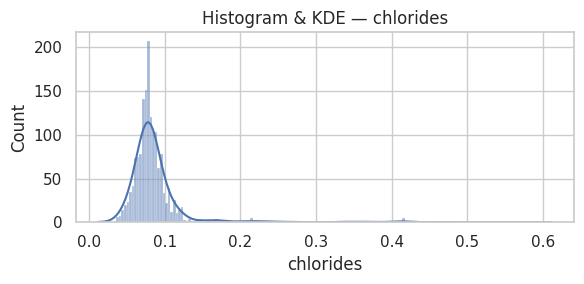

Explanation: This shows the distribution of chlorides. Look for skewness or multiple peaks.


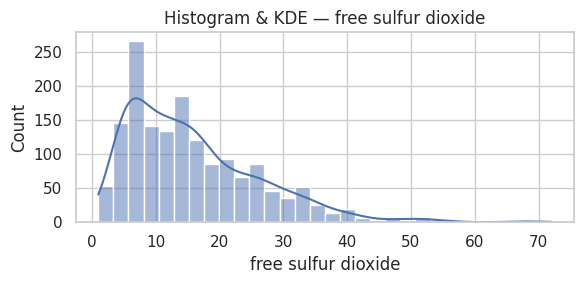

Explanation: This shows the distribution of free sulfur dioxide. Look for skewness or multiple peaks.


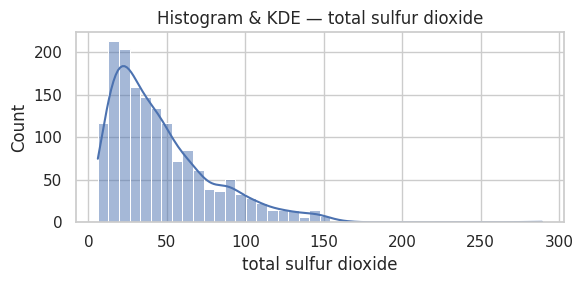

Explanation: This shows the distribution of total sulfur dioxide. Look for skewness or multiple peaks.


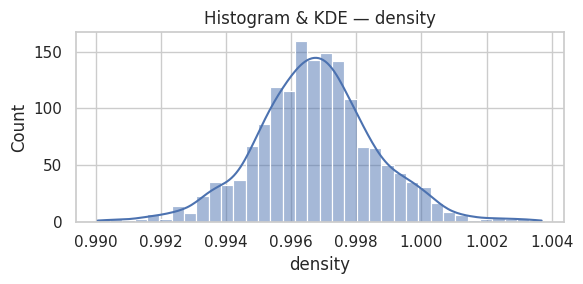

Explanation: This shows the distribution of density. Look for skewness or multiple peaks.


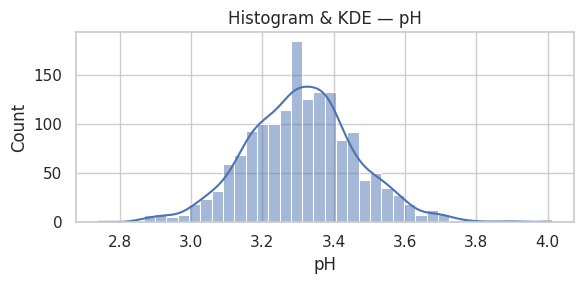

Explanation: This shows the distribution of pH. Look for skewness or multiple peaks.


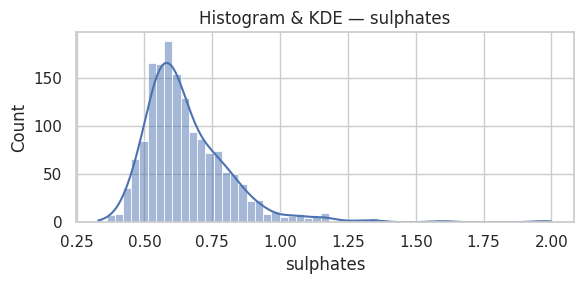

Explanation: This shows the distribution of sulphates. Look for skewness or multiple peaks.


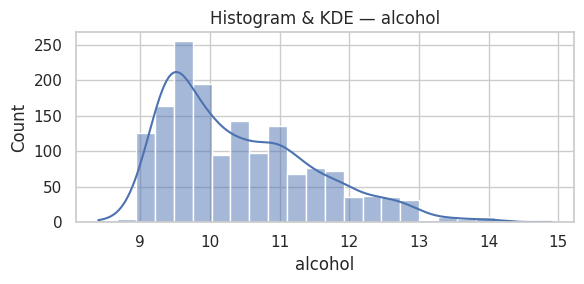

Explanation: This shows the distribution of alcohol. Look for skewness or multiple peaks.


In [ ]:
# Histograms for all numeric features (separate plots)
features = df.columns[:-1]  # all except 'quality'
for col in features:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram & KDE — {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f'Explanation: This shows the distribution of {col}. Look for skewness or multiple peaks.')


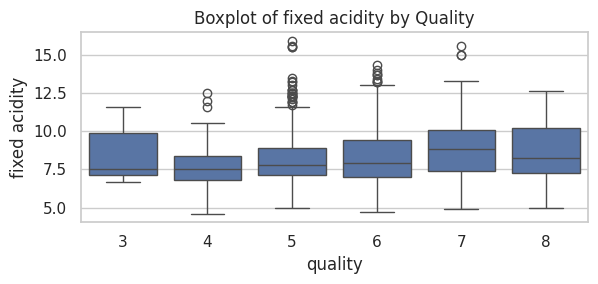

Explanation: Boxplot of fixed acidity grouped by quality helps see how medians and spread change with quality.


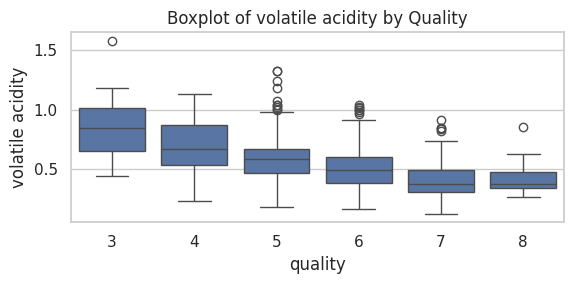

Explanation: Boxplot of volatile acidity grouped by quality helps see how medians and spread change with quality.


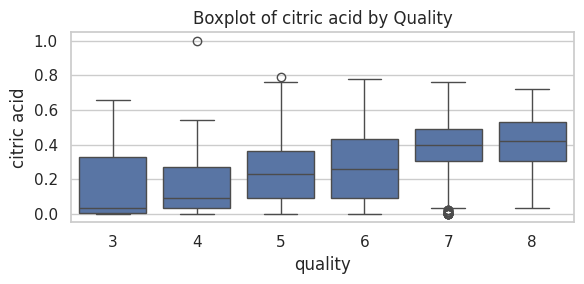

Explanation: Boxplot of citric acid grouped by quality helps see how medians and spread change with quality.


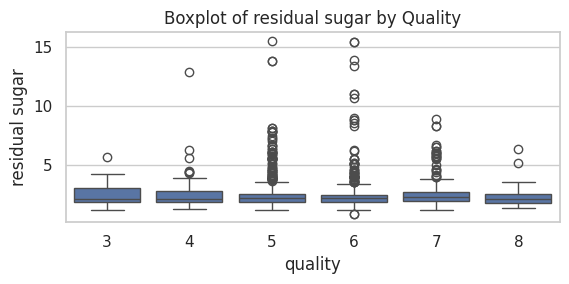

Explanation: Boxplot of residual sugar grouped by quality helps see how medians and spread change with quality.


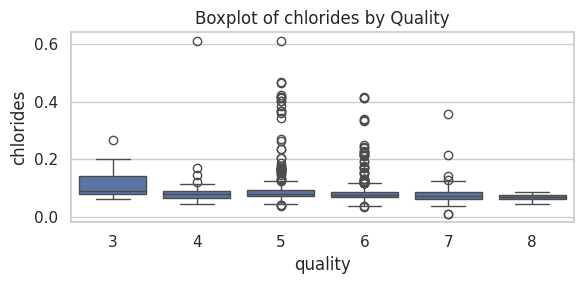

Explanation: Boxplot of chlorides grouped by quality helps see how medians and spread change with quality.


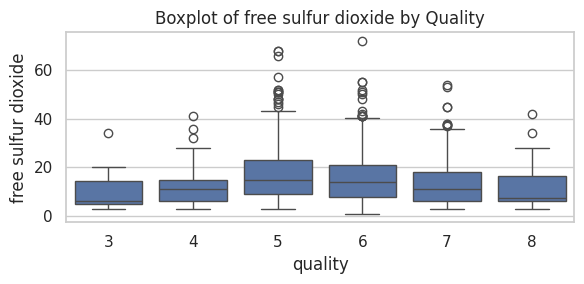

Explanation: Boxplot of free sulfur dioxide grouped by quality helps see how medians and spread change with quality.


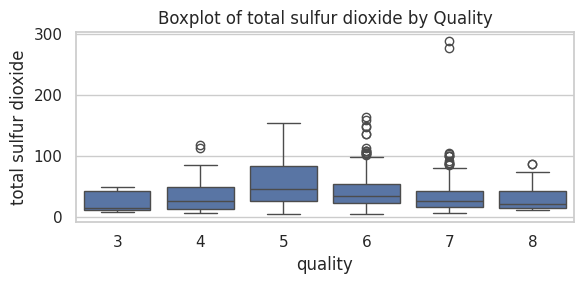

Explanation: Boxplot of total sulfur dioxide grouped by quality helps see how medians and spread change with quality.


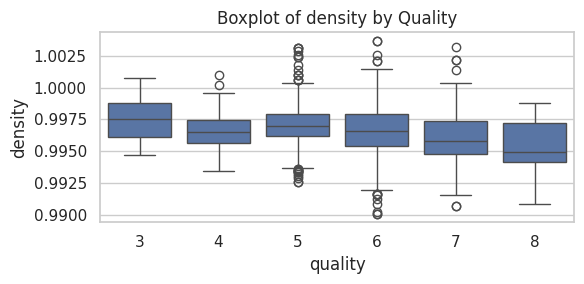

Explanation: Boxplot of density grouped by quality helps see how medians and spread change with quality.


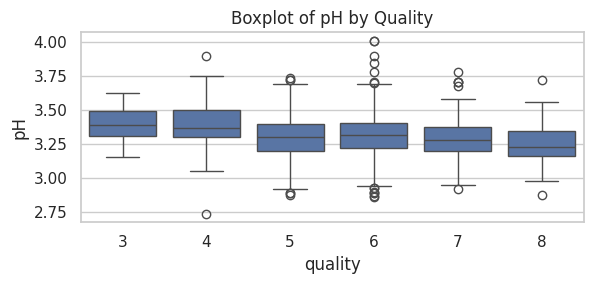

Explanation: Boxplot of pH grouped by quality helps see how medians and spread change with quality.


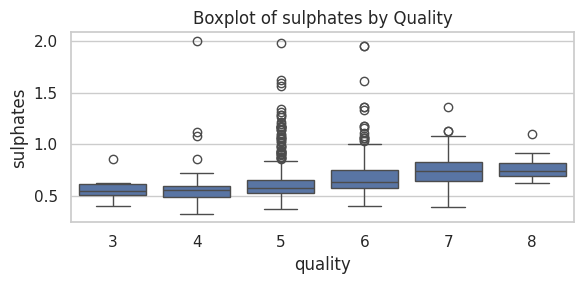

Explanation: Boxplot of sulphates grouped by quality helps see how medians and spread change with quality.


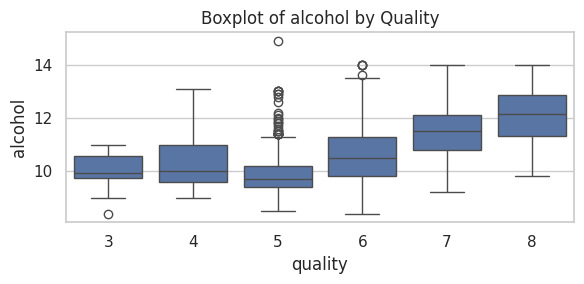

Explanation: Boxplot of alcohol grouped by quality helps see how medians and spread change with quality.


In [ ]:
# Boxplots: each feature vs quality (separate)
for col in features:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='quality', y=col, data=df)
    plt.title(f'Boxplot of {col} by Quality')
    plt.tight_layout()
    plt.show()
    print(f'Explanation: Boxplot of {col} grouped by quality helps see how medians and spread change with quality.')


Top features correlated with quality: ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']


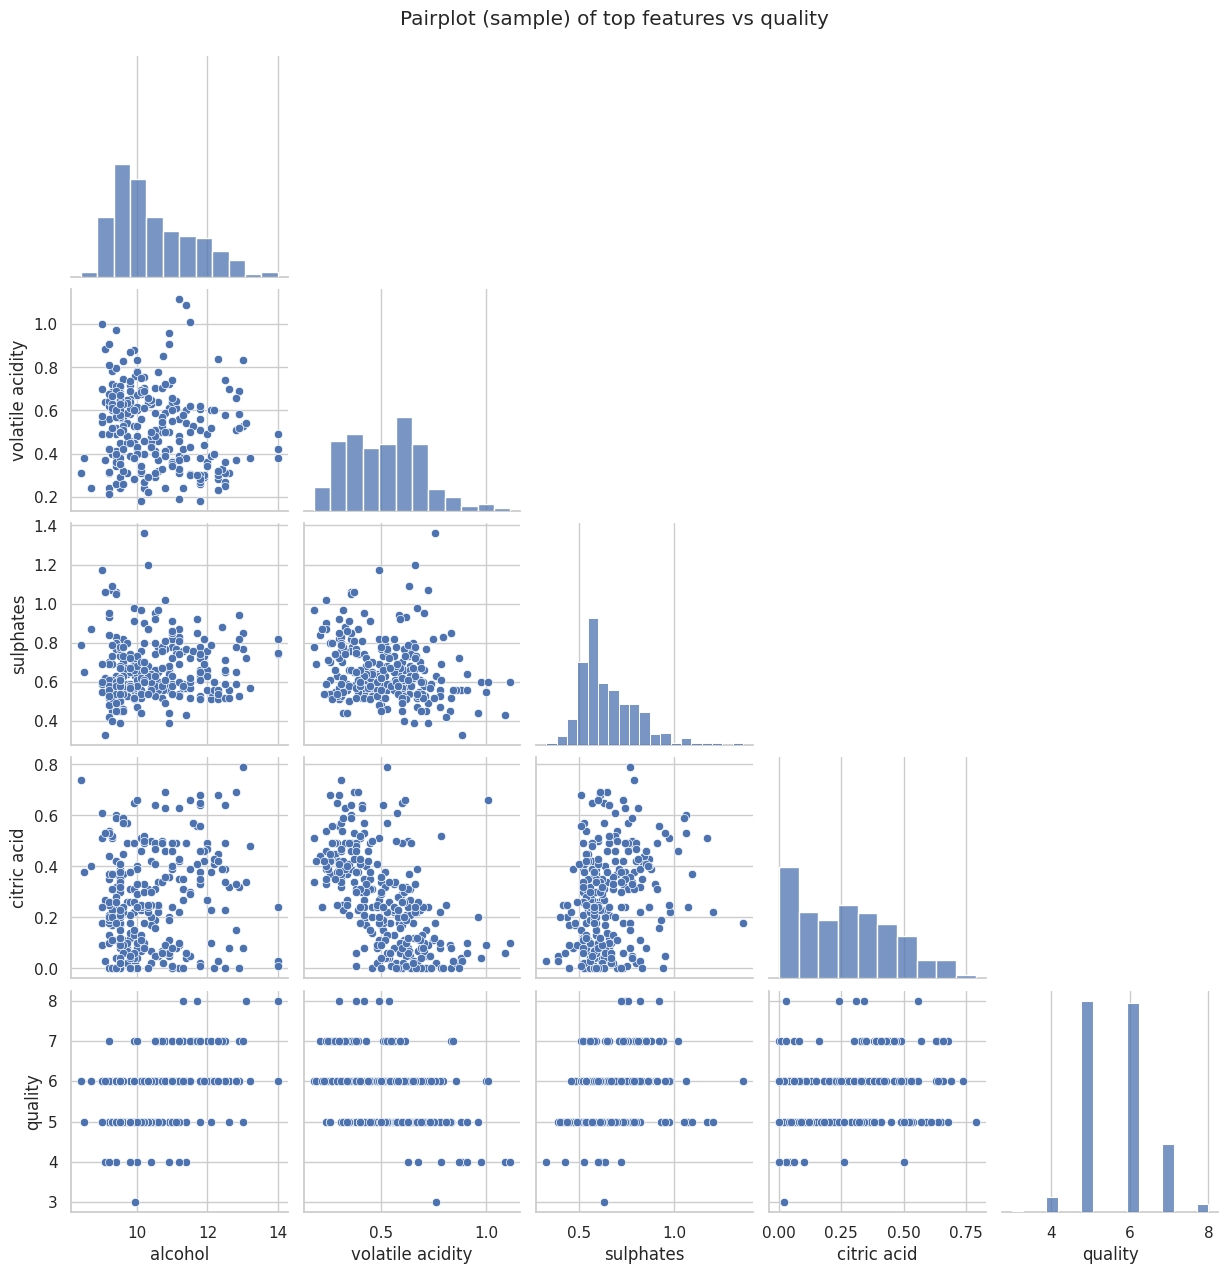

Explanation: Pairplot helps visualize pairwise relationships and how they relate to quality.


In [ ]:
# Pairplot for a few most-correlated features with quality
corr = df.corr()['quality'].abs().sort_values(ascending=False)
top_feats = corr.index[1:5].tolist()  # pick top 4 features correlated with quality (excluding 'quality' itself)
print('Top features correlated with quality:', top_feats)

sns.pairplot(df[top_feats + ['quality']].sample(300, random_state=42), corner=True)
plt.suptitle('Pairplot (sample) of top features vs quality', y=1.02)
plt.show()
print('Explanation: Pairplot helps visualize pairwise relationships and how they relate to quality.')


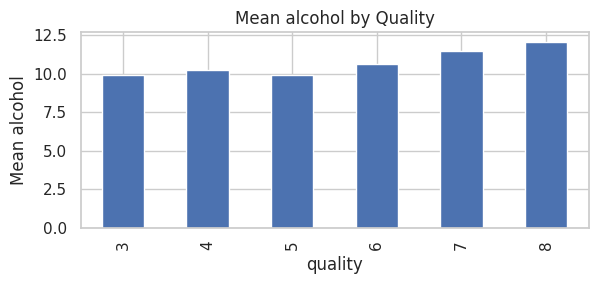

Explanation: This barplot shows average alcohol for each quality score.


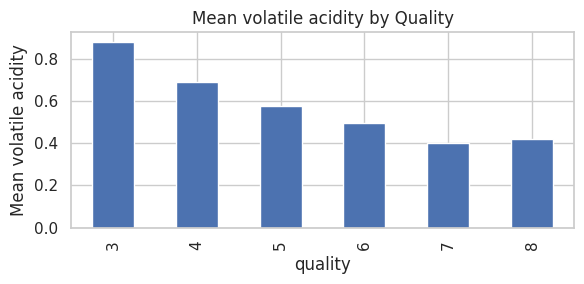

Explanation: This barplot shows average volatile acidity for each quality score.


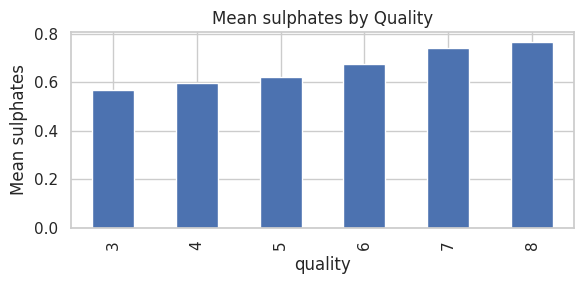

Explanation: This barplot shows average sulphates for each quality score.


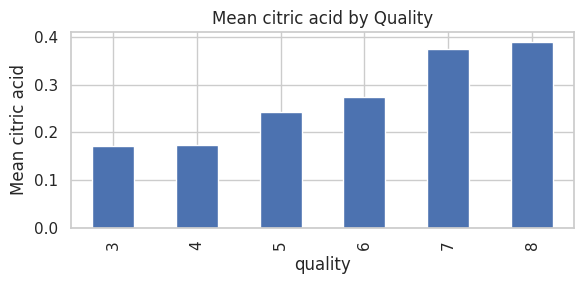

Explanation: This barplot shows average citric acid for each quality score.


In [ ]:
# Barplots: mean of selected features grouped by quality
selected = top_feats  # reuse top correlated features
for col in selected:
    plt.figure(figsize=(6,3))
    df.groupby('quality')[col].mean().plot(kind='bar')
    plt.title(f'Mean {col} by Quality')
    plt.ylabel(f'Mean {col}')
    plt.tight_layout()
    plt.show()
    print(f'Explanation: This barplot shows average {col} for each quality score.')


## Feature Selection
We check and remove **constant features**, **quasi-constant features** (near zero variance), and **one feature from highly correlated pairs** (threshold 0.90). We'll display what gets removed and then use the cleaned feature set for modeling.

In [ ]:
X = df.drop('quality', axis=1).copy()

# 1) Constant features
selector = VarianceThreshold(threshold=0.0)
selector.fit(X)
constant_cols = [col for col in X.columns if col not in X.columns[selector.get_support()]]
print('Constant features:', constant_cols)

# 2) Quasi-constant features (threshold set to keep features with tiny variance)
selector_q = VarianceThreshold(threshold=0.01)
selector_q.fit(X)
quasi_constant_cols = [col for col in X.columns if col not in X.columns[selector_q.get_support()]]
print('Quasi-constant features (approx):', quasi_constant_cols)

# 3) Highly correlated features
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [column for column in upper.columns if any(upper[column] > 0.90)]
print('Features to consider dropping due to high correlation (one of each pair):', high_corr_cols)

# Decide to drop quasi-constant and high_corr_cols (but not constant if empty)
cols_to_drop = list(set(quasi_constant_cols + high_corr_cols))
print('Dropping columns:', cols_to_drop)

X_clean = X.drop(columns=cols_to_drop, errors='ignore')
print('Shape before:', X.shape, 'after:', X_clean.shape)

# Final dataframe to use
df_model = pd.concat([X_clean, df['quality']], axis=1)
df_model.head()


Constant features: []
Quasi-constant features (approx): ['chlorides', 'density']
Features to consider dropping due to high correlation (one of each pair): []
Dropping columns: ['chlorides', 'density']
Shape before: (1599, 11) after: (1599, 9)


,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,11.0,34.0,3.51,0.56,9.4,5


## Part A — Regression
We use the cleaned features to predict **quality** as a continuous variable. Models: **Linear Regression**, **Ridge**, **Lasso**. Metrics and plots are shown for each model.

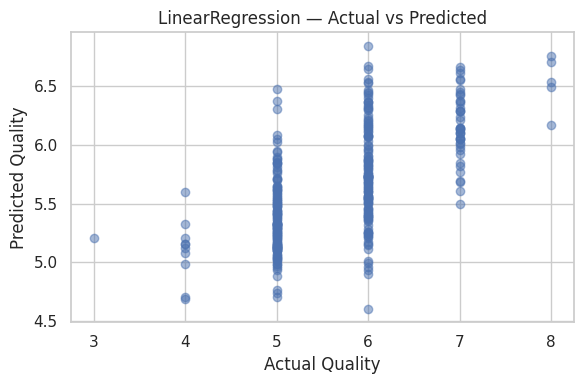

Explanation: Points along the diagonal indicate good predictions; spread indicates errors.


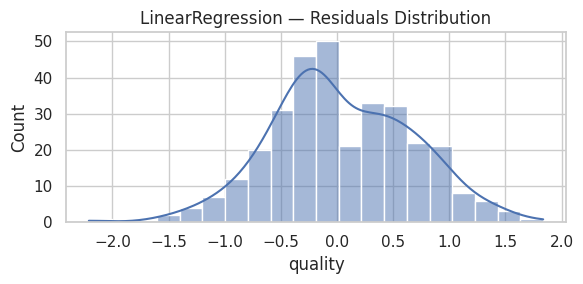

Explanation: Residuals centered near zero are desirable; large tails mean some big errors.


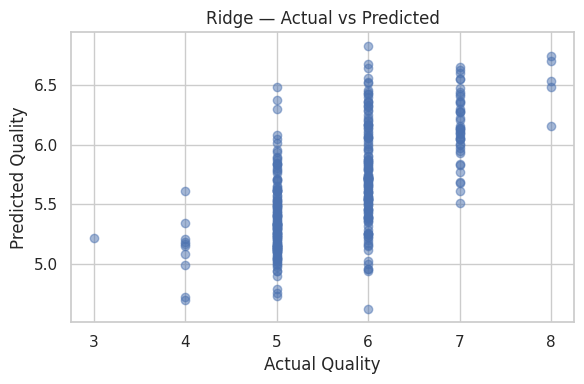

Explanation: Points along the diagonal indicate good predictions; spread indicates errors.


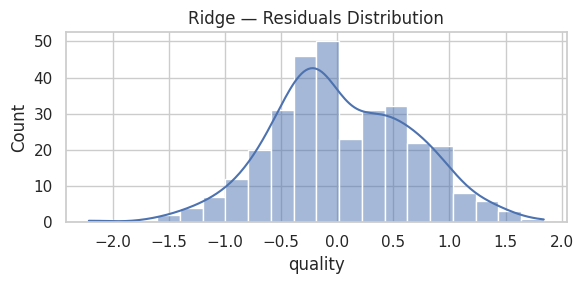

Explanation: Residuals centered near zero are desirable; large tails mean some big errors.


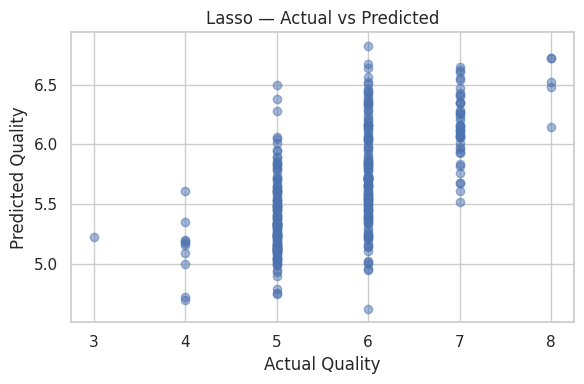

Explanation: Points along the diagonal indicate good predictions; spread indicates errors.


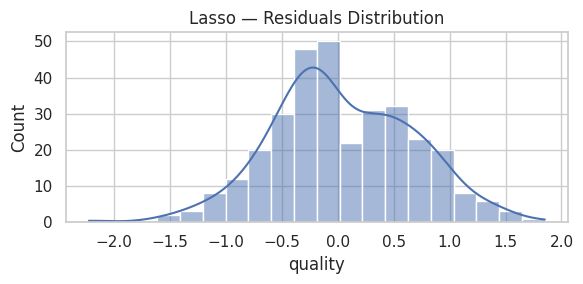

Explanation: Residuals centered near zero are desirable; large tails mean some big errors.


,r2,rmse,mae
model,,,
LinearRegression,0.393391,0.629621,0.508704
Ridge,0.391569,0.630566,0.509396
Lasso,0.389886,0.631438,0.510320


In [ ]:
# Prepare data for regression
X = df_model.drop('quality', axis=1)
y = df_model['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models_reg = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.001)
}

results = []
for name, model in models_reg.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae = mean_absolute_error(y_test, pred)
    results.append({'model': name, 'r2': r2, 'rmse': rmse, 'mae': mae})
    # Plot Actual vs Pred for each model
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, pred, alpha=0.5)
    plt.xlabel('Actual Quality')
    plt.ylabel('Predicted Quality')
    plt.title(f'{name} — Actual vs Predicted')
    plt.tight_layout()
    plt.show()
    print('Explanation: Points along the diagonal indicate good predictions; spread indicates errors.')
    # Residuals
    plt.figure(figsize=(6,3))
    sns.histplot(y_test - pred, bins=20, kde=True)
    plt.title(f'{name} — Residuals Distribution')
    plt.tight_layout()
    plt.show()
    print('Explanation: Residuals centered near zero are desirable; large tails mean some big errors.')

# Comparison table
results_df = pd.DataFrame(results).set_index('model')
results_df


##  Part B — Classification
We convert quality into binary labels: **Good (quality >= 7)** vs **Bad (<7)**. Models: **Logistic Regression**, **Random Forest**. We'll show confusion matrices, ROC curves, feature importance (from RF), and a comparison table (accuracy, precision, recall, F1, AUC).

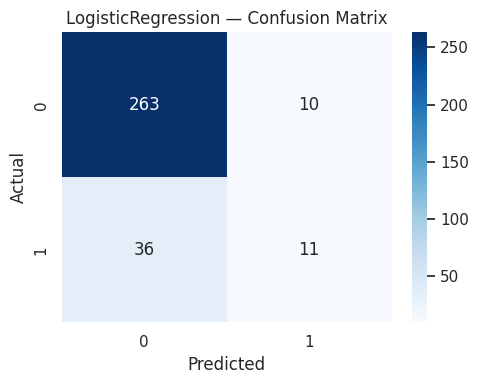

Explanation: Confusion matrix shows true/false positives and negatives.


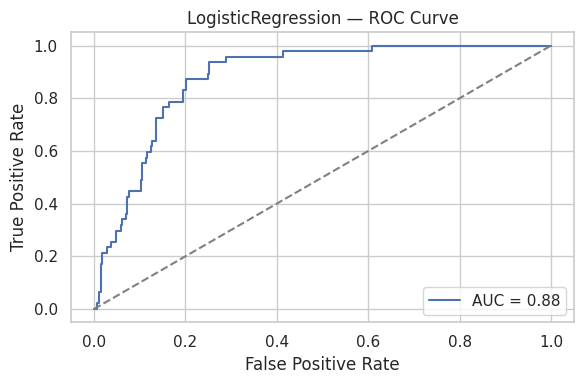

Explanation: ROC curve shows tradeoff between TPR and FPR; higher AUC is better.


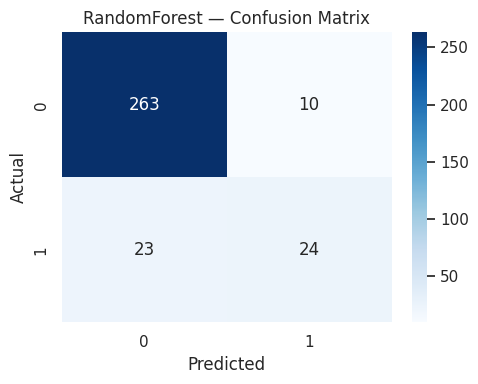

Explanation: Confusion matrix shows true/false positives and negatives.


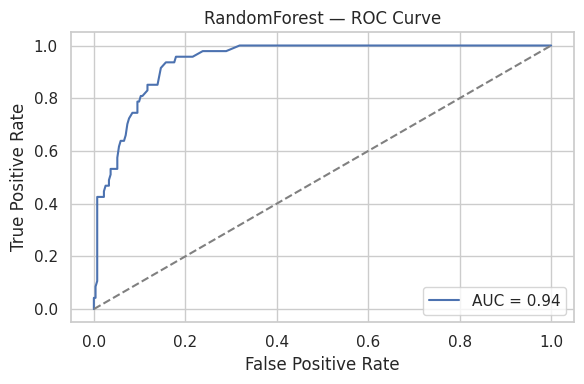

Explanation: ROC curve shows tradeoff between TPR and FPR; higher AUC is better.


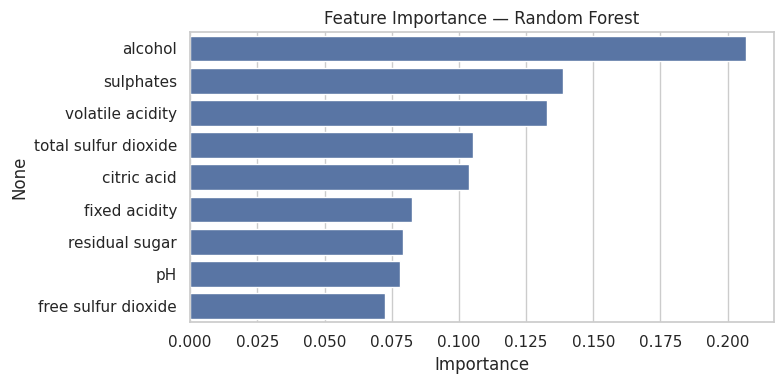

Explanation: Higher values indicate features that the Random Forest found more useful for classification.


,accuracy,precision,recall,f1,auc
model,,,,,
LogisticRegression,0.856250,0.523810,0.234043,0.323529,0.879588
RandomForest,0.896875,0.705882,0.510638,0.592593,0.942249


In [ ]:
# Create binary label
df_clf = df_model.copy()
df_clf['quality_label'] = (df_clf['quality'] >= 7).astype(int)
Xc = df_clf.drop('quality', axis=1).drop('quality_label', axis=1)
yc = df_clf['quality_label']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

models_clf = {
    'LogisticRegression': LogisticRegression(max_iter=2000),
    'RandomForest': RandomForestClassifier(random_state=42)
}

clf_results = []
for name, model in models_clf.items():
    model.fit(Xc_train, yc_train)
    y_pred = model.predict(Xc_test)
    # probabilities for ROC
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(Xc_test)[:,1]
    else:
        y_prob = model.decision_function(Xc_test)
    acc = accuracy_score(yc_test, y_pred)
    prec = precision_score(yc_test, y_pred, zero_division=0)
    rec = recall_score(yc_test, y_pred, zero_division=0)
    f1 = f1_score(yc_test, y_pred, zero_division=0)
    fpr, tpr, _ = roc_curve(yc_test, y_prob)
    auc_score = auc(fpr, tpr)
    clf_results.append({'model': name, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'auc': auc_score})

    # Confusion matrix
    cm = confusion_matrix(yc_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} — Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    print('Explanation: Confusion matrix shows true/false positives and negatives.')

    # ROC curve
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} — ROC Curve')
    plt.legend()
    plt.tight_layout()
    plt.show()
    print('Explanation: ROC curve shows tradeoff between TPR and FPR; higher AUC is better.')

# Feature importance from Random Forest
rf = models_clf['RandomForest']
if hasattr(rf, 'feature_importances_'):
    fi = pd.Series(rf.feature_importances_, index=Xc.columns).sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=fi.values, y=fi.index)
    plt.title('Feature Importance — Random Forest')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    print('Explanation: Higher values indicate features that the Random Forest found more useful for classification.')

# Classification comparison table
clf_results_df = pd.DataFrame(clf_results).set_index('model')
clf_results_df


##  Final Comparison & Summary
Below we summarize regression and classification results and state a short recommendation.

In [ ]:
print('Regression results:')
display(results_df)
print('\nClassification results:')
display(clf_results_df)

# Quick recommendation based on metrics
best_reg = results_df['r2'].idxmax()
best_clf = clf_results_df['f1'].idxmax()

print(f'Best regression model (by R²): {best_reg}')
print(f'Best classification model (by F1): {best_clf}')

print('\nShort summary:')
print('- For regression, prefer the model with highest R² and lowest RMSE (see table).')
print('- For classification, prefer the model with best balance of precision/recall (F1) and decent AUC.')


Regression results:


,r2,rmse,mae
model,,,
LinearRegression,0.393391,0.629621,0.508704
Ridge,0.391569,0.630566,0.509396
Lasso,0.389886,0.631438,0.510320



Classification results:


,accuracy,precision,recall,f1,auc
model,,,,,
LogisticRegression,0.856250,0.523810,0.234043,0.323529,0.879588
RandomForest,0.896875,0.705882,0.510638,0.592593,0.942249


Best regression model (by R²): LinearRegression
Best classification model (by F1): RandomForest

Short summary:
- For regression, prefer the model with highest R² and lowest RMSE (see table).
- For classification, prefer the model with best balance of precision/recall (F1) and decent AUC.
